In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("play_tennis.csv")

In [7]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [5]:
df.tail()

,day,outlook,temp,humidity,wind,play
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [6]:
df.isnull()

,day,outlook,temp,humidity,wind,play
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [7]:
df.isnull().sum()

day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [11]:
print("Unique Values in column country and gender are:")
for i in ['wind','temp']:
    print(f"{i} : {df[i].unique()}")

Unique Values in column country and gender are:
wind : ['Weak' 'Strong']
temp : ['Hot' 'Mild' 'Cool']


In [13]:
print("Unique Values in column country and gender are:")
for i in ['outlook','humidity']:
    print(f"{i} : {df[i].value_counts()}")

Unique Values in column country and gender are:
outlook : outlook
Sunny       5
Rain        5
Overcast    4
Name: count, dtype: int64
humidity : humidity
High      7
Normal    7
Name: count, dtype: int64


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

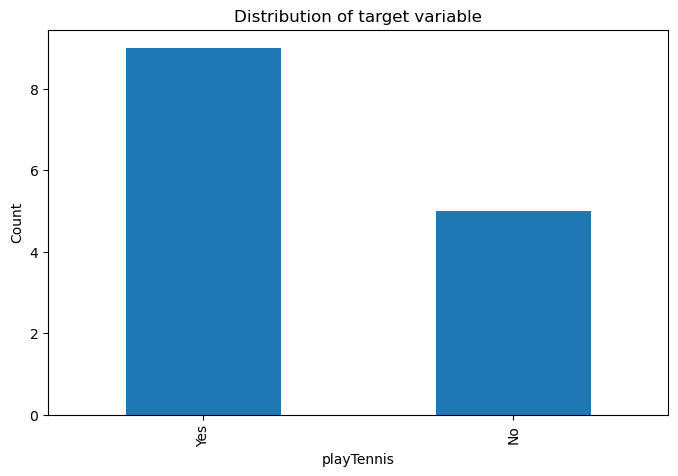

In [8]:
plt.figure(figsize=(8,5))
df['play'].value_counts().plot(kind='bar')
plt.title("Distribution of target variable")
plt.xlabel('playTennis')
plt.ylabel('Count')
plt.show()

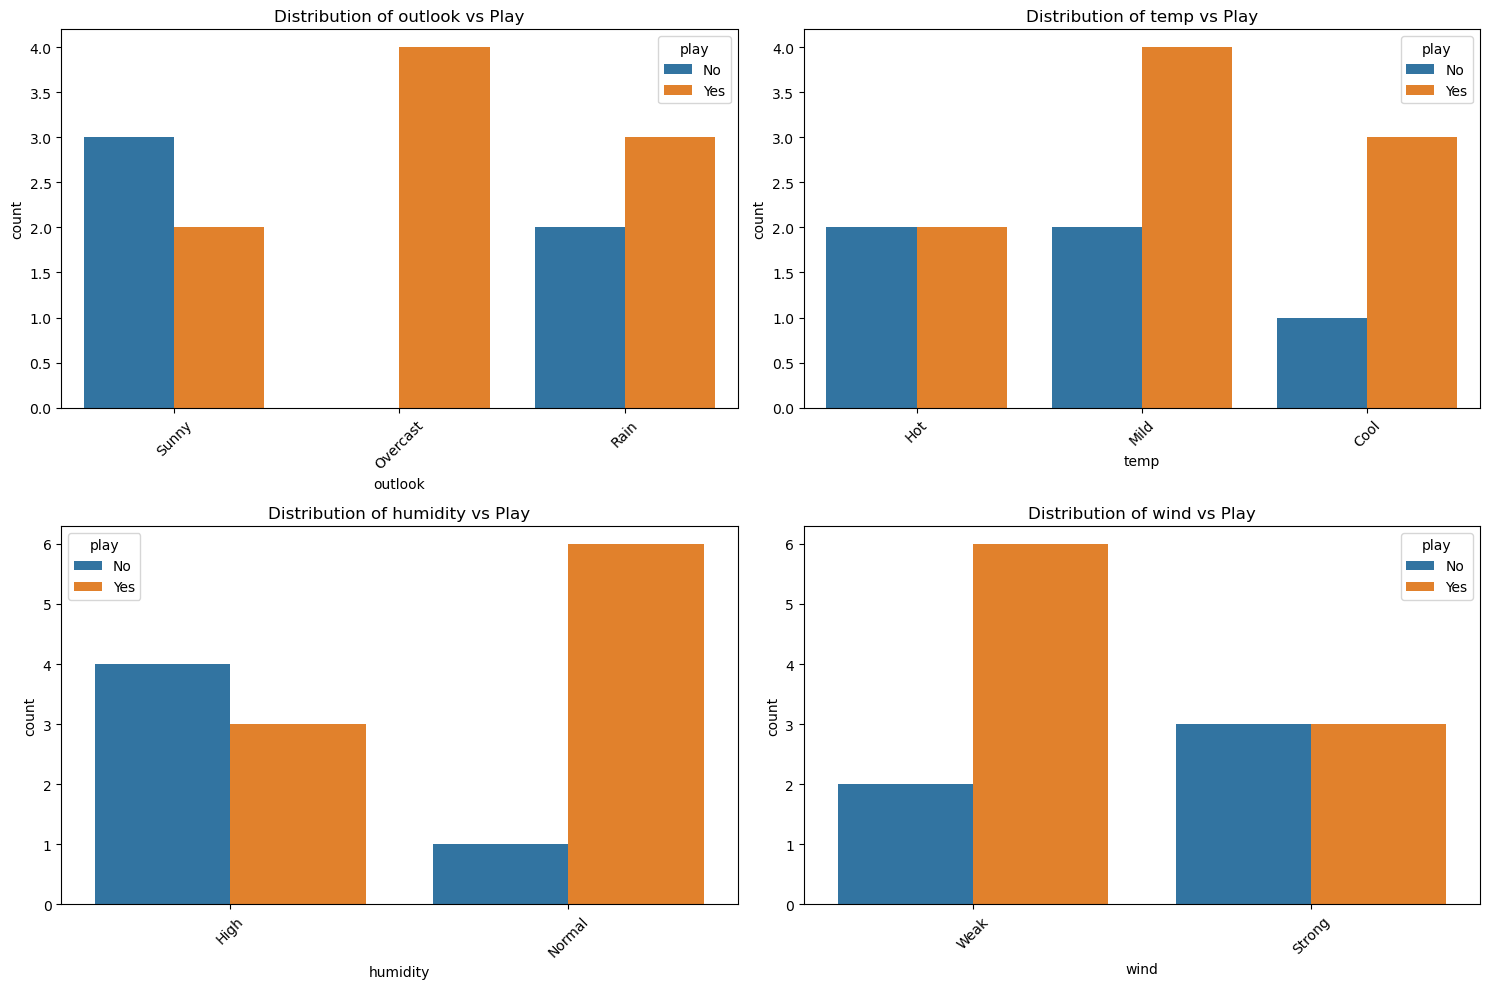

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
features = ['outlook', 'temp', 'humidity', 'wind']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    sns.countplot(data=df, x=feature, hue='play', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {feature} vs Play')
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [13]:

le = LabelEncoder()
df_encoded = df.copy()

categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_encoded[column] = le.fit_transform(df_encoded[column])

print("\nEncoded dataset head:")
print(df_encoded.head())


Encoded dataset head:
   day  outlook  temp  humidity  wind  play
0    0        2     1         0     1     0
1    6        2     1         0     0     0
2    7        0     1         0     1     1
3    8        1     2         0     1     1
4    9        1     0         1     1     1


In [14]:

X = df_encoded.drop(['play', 'day'], axis=1)
y = df_encoded['play']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


Training set shape: (11, 4)
Testing set shape: (3, 4)


DecisionTreeClassifier(random_state=42)

In [15]:

y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'accuracy_score' is not defined

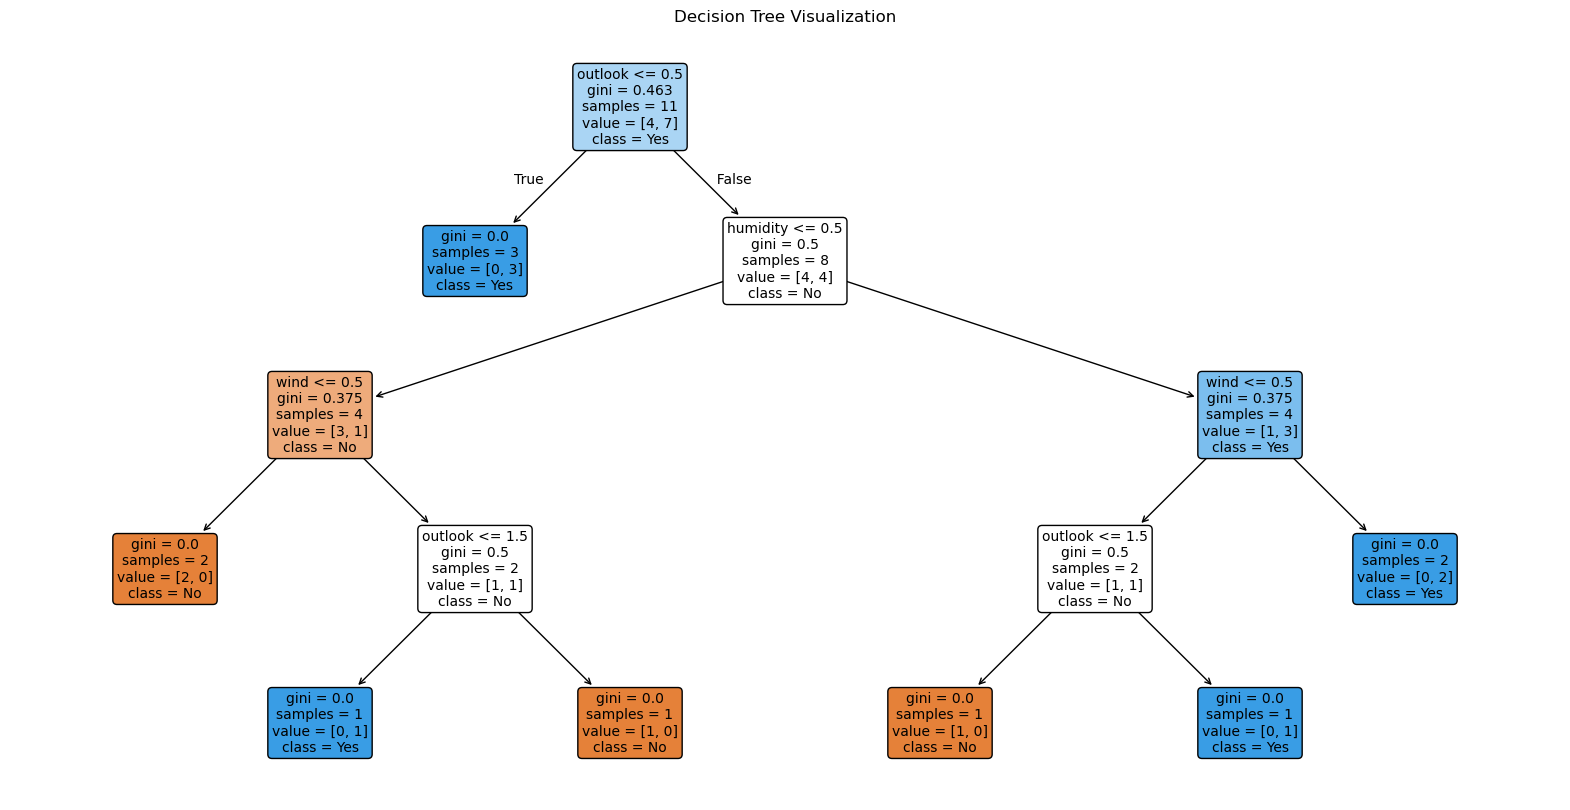

In [16]:
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'],
          filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

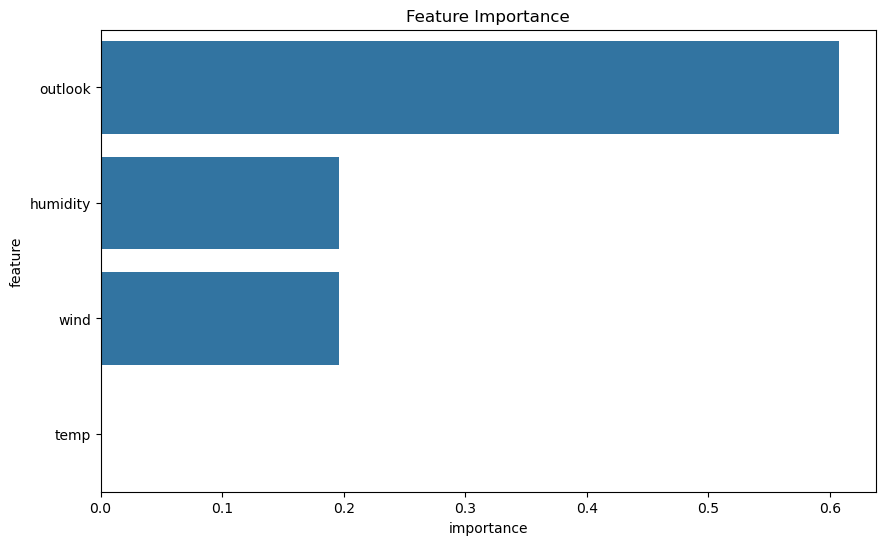

In [17]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [18]:
print("\n10. Detailed Model Performance Metrics")
print("-" * 50)
print("\nFeature Importance:")
print(feature_importance)


10. Detailed Model Performance Metrics
--------------------------------------------------

Feature Importance:
    feature  importance
0   outlook    0.607143
2  humidity    0.196429
3      wind    0.196429
1      temp    0.000000


In [19]:
print("\n11. Sample Prediction")
print("-" * 50)
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = dt_classifier.predict(sample_data)
print(f"\nSample Input: {X_test.iloc[0]}")
print(f"Predicted: {'Yes' if prediction[0] == 1 else 'No'}")


11. Sample Prediction
--------------------------------------------------

Sample Input: outlook     1
temp        2
humidity    1
wind        1
Name: 9, dtype: int32
Predicted: Yes


C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Prediction Examples with Different Weather Conditions:
----------------------------------------------------------------------

Prediction Results:
                       Scenario                                                Weather Conditions Prediction Confidence
Sunny day with mild temperature Outlook: Sunny, Temperature: Mild, Humidity: Normal, Wind: Strong        Yes    100.00%
             Rainy and cool day    Outlook: Rain, Temperature: Cool, Humidity: Normal, Wind: Weak        Yes    100.00%
               Hot overcast day   Outlook: Overcast, Temperature: Hot, Humidity: High, Wind: Weak        Yes    100.00%
 Hot sunny day with strong wind    Outlook: Sunny, Temperature: Hot, Humidity: High, Wind: Strong         No    100.00%


C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f

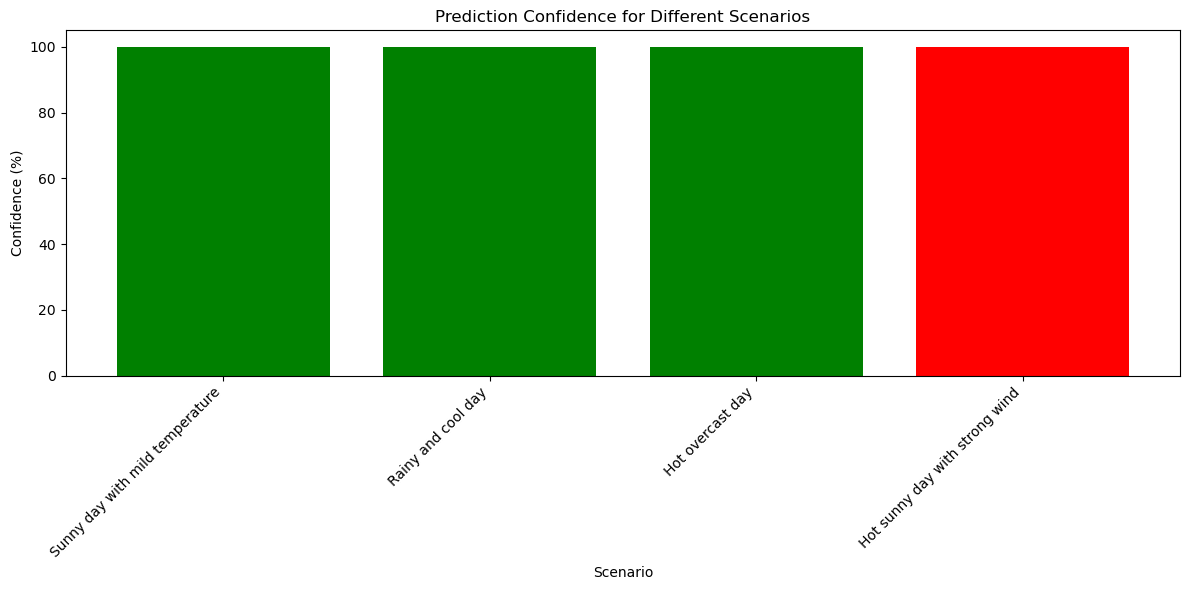


Detailed Prediction Example:

Weather Conditions:
Outlook: Sunny
Temperature: Mild
Humidity: Normal
Wind: Weak

Prediction: Play
Confidence: 100.00%

Decision Path:
Step 1: Checking Outlook
Step 2: Checking Humidity
Step 3: Checking Outlook

Seasonal Playing Patterns:
Season Play Probability
Summer            33.3%
Spring           100.0%


C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f5i\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\vishu_pdk4f

In [20]:
outlook_map = {'Sunny': 2, 'Overcast': 0, 'Rain': 1}
temp_map = {'Hot': 1, 'Mild': 2, 'Cool': 0}
humidity_map = {'High': 0, 'Normal': 1}
wind_map = {'Weak': 1, 'Strong': 0}

def predict_play_tennis(outlook, temp, humidity, wind):
    """
    Make predictions using the trained decision tree model
    """
    # Encode the input values
    outlook_encoded = outlook_map[outlook]
    temp_encoded = temp_map[temp]
    humidity_encoded = humidity_map[humidity]
    wind_encoded = wind_map[wind]

    # Create input array for prediction
    input_data = np.array([[outlook_encoded, temp_encoded, humidity_encoded, wind_encoded]])

    # Make prediction
    prediction = dt_classifier.predict(input_data)
    probability = dt_classifier.predict_proba(input_data)

    return prediction[0], probability[0]

def print_prediction_details(outlook, temp, humidity, wind):
    """
    Print detailed prediction results including decision path
    """
    prediction, probability = predict_play_tennis(outlook, temp, humidity, wind)

    print(f"\nWeather Conditions:")
    print(f"Outlook: {outlook}")
    print(f"Temperature: {temp}")
    print(f"Humidity: {humidity}")
    print(f"Wind: {wind}")
    print(f"\nPrediction: {'Play' if prediction == 1 else 'Do Not Play'}")
    print(f"Confidence: {max(probability) * 100:.2f}%")

    # Display decision path
    feature_names = ['Outlook', 'Temperature', 'Humidity', 'Wind']
    decision_path = dt_classifier.decision_path(np.array([[
        outlook_map[outlook],
        temp_map[temp],
        humidity_map[humidity],
        wind_map[wind]
    ]]))

    print("\nDecision Path:")
    path = decision_path[0].indices
    for idx, feature_idx in enumerate(path):
        if idx < len(path) - 1:
            print(f"Step {idx + 1}: Checking {feature_names[feature_idx % len(feature_names)]}")

# Test cases for different weather conditions
print("\nPrediction Examples with Different Weather Conditions:")
print("-" * 70)

test_cases = [
    {
        'outlook': 'Sunny',
        'temp': 'Mild',
        'humidity': 'Normal',
        'wind': 'Strong',
        'description': 'Sunny day with mild temperature'
    },
    {
        'outlook': 'Rain',
        'temp': 'Cool',
        'humidity': 'Normal',
        'wind': 'Weak',
        'description': 'Rainy and cool day'
    },
    {
        'outlook': 'Overcast',
        'temp': 'Hot',
        'humidity': 'High',
        'wind': 'Weak',
        'description': 'Hot overcast day'
    },
    {
        'outlook': 'Sunny',
        'temp': 'Hot',
        'humidity': 'High',
        'wind': 'Strong',
        'description': 'Hot sunny day with strong wind'
    }
]

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame(columns=['Scenario', 'Weather Conditions', 'Prediction', 'Confidence'])

# Process each test case
for i, case in enumerate(test_cases, 1):
    prediction, probability = predict_play_tennis(
        case['outlook'],
        case['temp'],
        case['humidity'],
        case['wind']
    )

    weather_conditions = (
        f"Outlook: {case['outlook']}, Temperature: {case['temp']}, "
        f"Humidity: {case['humidity']}, Wind: {case['wind']}"
    )

    predictions_df.loc[i] = [
        case['description'],
        weather_conditions,
        'Yes' if prediction == 1 else 'No',
        f"{max(probability) * 100:.2f}%"
    ]

# Display predictions in a formatted table
print("\nPrediction Results:")
print(predictions_df.to_string(index=False))

# Visualize predictions
plt.figure(figsize=(12, 6))
colors = ['green' if pred == 'Yes' else 'red' for pred in predictions_df['Prediction']]
confidence_values = [float(conf.strip('%')) for conf in predictions_df['Confidence']]

plt.bar(predictions_df['Scenario'], confidence_values, color=colors)
plt.title('Prediction Confidence for Different Scenarios')
plt.xlabel('Scenario')
plt.ylabel('Confidence (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Example usage of the prediction tool
print("\nDetailed Prediction Example:")
print_prediction_details('Sunny', 'Mild', 'Normal', 'Weak')

# Seasonal Analysis
seasons = [
    {
        'season': 'Summer',
        'conditions': [
            {'outlook': 'Sunny', 'temp': 'Hot', 'humidity': 'High', 'wind': 'Weak'},
            {'outlook': 'Sunny', 'temp': 'Hot', 'humidity': 'High', 'wind': 'Strong'},
            {'outlook': 'Overcast', 'temp': 'Hot', 'humidity': 'High', 'wind': 'Weak'}
        ]
    },
    {
        'season': 'Spring',
        'conditions': [
            {'outlook': 'Sunny', 'temp': 'Mild', 'humidity': 'Normal', 'wind': 'Weak'},
            {'outlook': 'Rain', 'temp': 'Mild', 'humidity': 'Normal', 'wind': 'Weak'},
            {'outlook': 'Overcast', 'temp': 'Mild', 'humidity': 'High', 'wind': 'Weak'}
        ]
    }
]

# Calculate seasonal predictions
seasonal_results = []
for season in seasons:
    play_count = 0
    for condition in season['conditions']:
        prediction, _ = predict_play_tennis(
            condition['outlook'],
            condition['temp'],
            condition['humidity'],
            condition['wind']
        )
        if prediction == 1:
            play_count += 1

    seasonal_results.append({
        'Season': season['season'],
        'Play Probability': f"{(play_count / len(season['conditions'])) * 100:.1f}%"
    })

seasonal_df = pd.DataFrame(seasonal_results)
print("\nSeasonal Playing Patterns:")
print(seasonal_df.to_string(index=False))